# Neural Network with Momentum

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf  # Used only to import Fashion_MNIST dataset
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
labels = {0: "T-shirt/top",
          1: "Trouser",
          2: "Pullover",
          3: "Dress",
          4: "Coat",
          5: "Sandal",
          6: "Shirt",
          7: "Sneaker",
          8: "Bag",
          9: "Ankle boot"
}

def relu(x, diff = False):
    if not diff:
        y = np.maximum(x, 0)
    else:
        y = (x > 0) * 1
    return y

def softmax(x):
    y = np.exp(x)
    return y / np.sum(y, axis=0)

1.14.0


## Format the images

Images are presented as a $784 \times 1$ column vector with $784 = 28 \times 28$ pixels. Pixel values are real values in range $[0, 1]$. One batch is a matrix $X$ with dimensions $784 \times m$, where $m$ is the batch size. Target values $Y$ are presented as a $10 \times m$ matrix, where each column is a one-hot vector, for example  $$ 4 = \pmatrix{0\\ 0\\ 0\\ 0\\ 1\\ 0\\ 0\\ 0\\ 0\\ 0}.$$

Images are presented as a  784×1  column vector with  784=28×28  pixels. Pixel values are real values in range  [0,1] . One batch is a matrix  𝑋  with dimensions  784×𝑚 , where  𝑚  is the batch size.
Target values  𝑌  are presented as a  10×𝑚  matrix, where each column is a one-hot vector, for example


In [12]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

# Scale the grayscale values [0, 255] into [0, 1]
X_train = X_train.astype('float32')
X_train /= 255
X_train = X_train.reshape(60000, 784)
X_test = X_test.astype('float32')
X_test /= 255
X_test = X_test.reshape(10000, 784)

# Convert the target values into a "one hot" array,
# for axample: 4 -> [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Y_train = np.zeros((60000, 10))
Y_test = np.zeros((10000, 10))
for k in range(0, 60000):
    Y_train[k, y_train[k]] = 1
for k in range(0, 10000):
    Y_test[k, y_test[k]] = 1
    
X_train = np.transpose(X_train)
X_test = np.transpose(X_test)
Y_train = np.transpose(Y_train)
Y_test = np.transpose(Y_test)

## Train the network using the backpropagation algorithm

The network has an input layer of 784 cells, and two hidden layers of 128 cells with relu activation. The output layer has 10 cells with softmax activation.

Epoch 0 :	 J =  2.301638899127615 	 J_test =  2.2998728614326867
Epoch 10 :	 J =  0.699864279689247 	 J_test =  0.6639544508882086
Epoch 20 :	 J =  0.5523155675346674 	 J_test =  0.5478043211563514
Epoch 30 :	 J =  0.4809670931838004 	 J_test =  0.48441210186214095
Epoch 40 :	 J =  0.43030583098804964 	 J_test =  0.44048005209948843
Epoch 50 :	 J =  0.39719653920850173 	 J_test =  0.41516734656843146
Epoch 60 :	 J =  0.37386608902307616 	 J_test =  0.3942459611868112
Epoch 70 :	 J =  0.3555087267788577 	 J_test =  0.3823802360023182
Epoch 80 :	 J =  0.33836273837611835 	 J_test =  0.3686674799842057
Epoch 90 :	 J =  0.32595610684815113 	 J_test =  0.36237831227609085


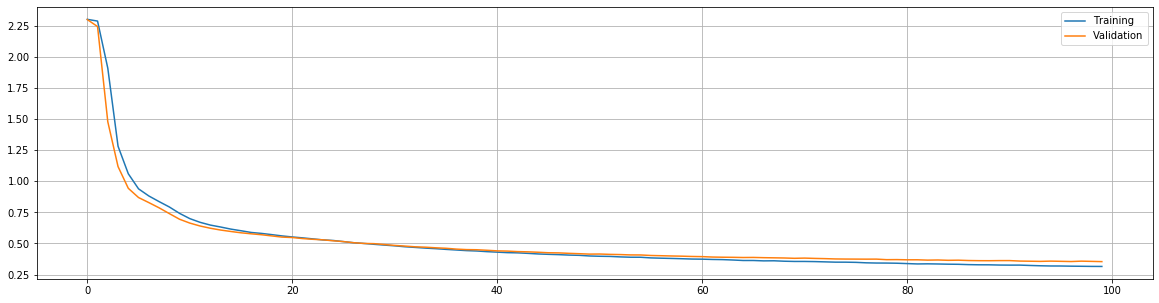

In [13]:
# Initialize the coefficients
W1 = np.random.randn(128, 784) * 0.01
b1 = np.zeros((128, 1))
W2 = np.random.randn(128, 128) * 0.01
b2 = np.zeros((128, 1))
W3 = np.random.randn(10, 128) * 0.01
b3 = np.zeros((10, 1))

vdW1 = np.zeros((128, 784))
vdb1 = np.zeros((128, 1))
vdW2 = np.zeros((128, 128))
vdb2 = np.zeros((128, 1))
vdW3 = np.zeros((10, 128))
vdb3 = np.zeros((10, 1))

# Batch size m = 100: 60000 / 100 = 600 batches
alpha = 0.01   # Learning rate
beta = 0.9     # Momentum
lambd = 0.001  # Regularization
epochs = 100   # Number of epochs
costs = []
costs_test = []
m = 100
keep_prob = 0.9

for epoch in range(epochs):
    J = 0
    for k in range(600):
        X = X_train[:, m*k : m*(k+1)]
        Y = Y_train[:, m*k : m*(k+1)]
        
        # Dropout
        D1 = (np.random.rand(128, m) < keep_prob).astype(int)
        D2 = (np.random.rand(128, m) < keep_prob).astype(int)
        
        Z1 = np.dot(W1, X) + b1
        A1 = relu(Z1) * D1 / keep_prob
        Z2 = np.dot(W2, A1) + b2
        A2 = relu(Z2) * D2 / keep_prob
        Z3 = np.dot(W3, A2) + b3
        A3 = softmax(Z3) 
        
        dZ3 = A3 - Y
        dA2 = np.dot(W3.T, dZ3) * D1 / keep_prob
        dZ2 = relu(Z2, diff = True) * dA2
        dA1 = np.dot(W2.T, dZ2) * D1 / keep_prob
        dZ1 = relu(Z1, diff = True) * dA1
        
        dW1 = (np.dot(dZ1, X.T) + lambd * W1) / m
        db1 = np.sum(dZ1, axis=1, keepdims=True) / m
        dW2 = (np.dot(dZ2, A1.T) + lambd * W2) / m
        db2 = np.sum(dZ2, axis=1, keepdims=True) / m
        dW3 = (np.dot(dZ3, A2.T) + lambd * W3) / m
        db3 = np.sum(dZ3, axis=1, keepdims=True) / m
        
        # Momentum
        vdW1 = beta*vdW1 + (1 - beta)*dW1
        vdb1 = beta*vdb1 + (1 - beta)*db1
        vdW2 = beta*vdW2 + (1 - beta)*dW2
        vdb2 = beta*vdb2 + (1 - beta)*db2
        vdW3 = beta*vdW3 + (1 - beta)*dW3
        vdb3 = beta*vdb3 + (1 - beta)*db3
        
        W1 = W1 - alpha * vdW1
        b1 = b1 - alpha * vdb1
        W2 = W2 - alpha * vdW2
        b2 = b2 - alpha * vdb2
        W3 = W3 - alpha * vdW3
        b3 = b3 - alpha * vdb3
        
        J = J - np.sum(Y * np.log(A3))
        
    J = J / 60000
    costs.append(J)
        
    X = X_test
    Y = Y_test
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = softmax(Z3)
    
    J_test = - np.sum(Y * np.log(A3)) / 10000
    costs_test.append(J_test)
    
    if (epoch % 10 == 0):
        print('Epoch', epoch, ':\t J = ', J, '\t J_test = ', J_test)
    
plt.figure(figsize=(20, 5))
plt.plot(costs, label="Training")
plt.plot(costs_test, label="Validation")
plt.legend()
plt.grid()
plt.show()

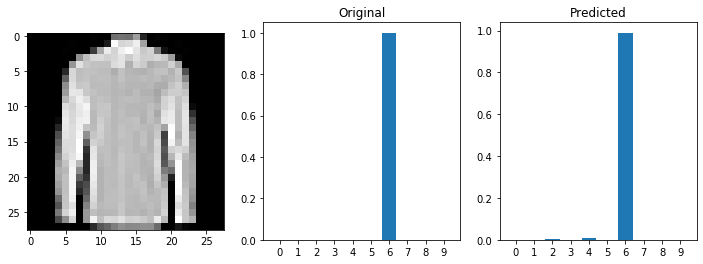

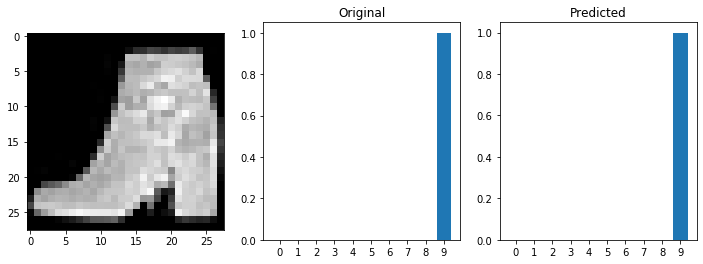

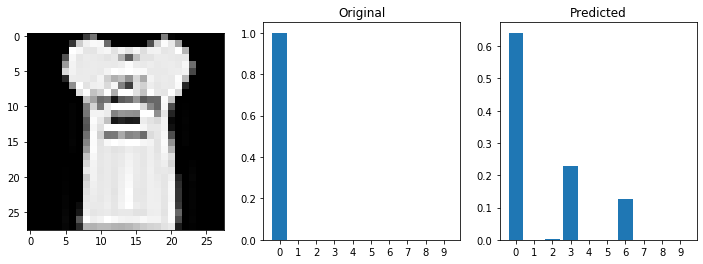

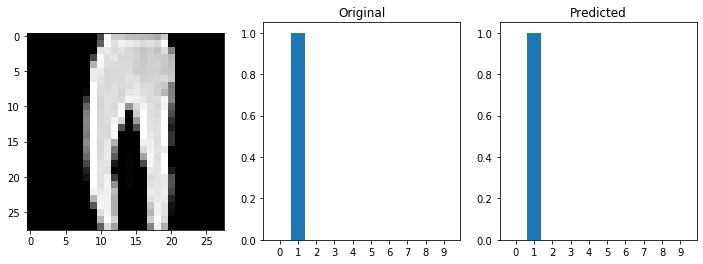

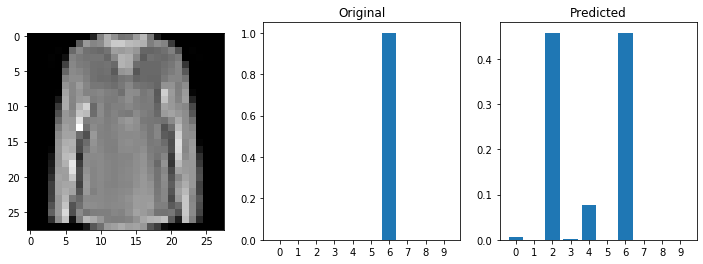

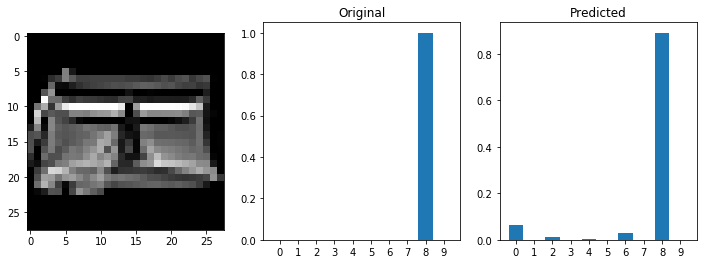

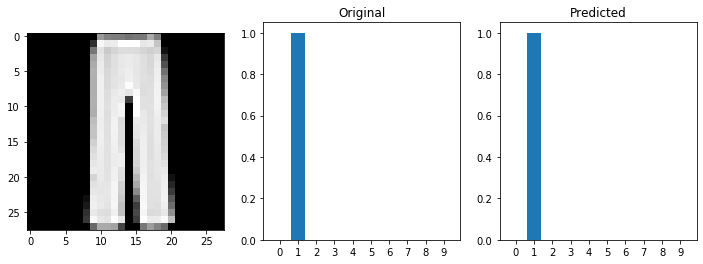

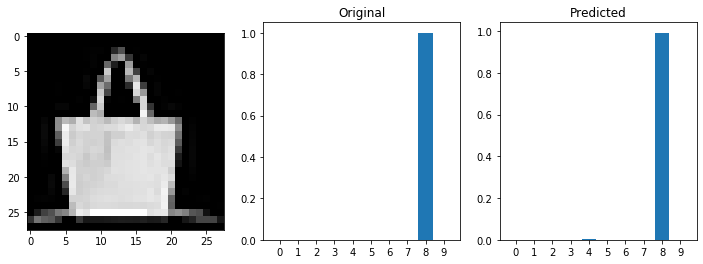

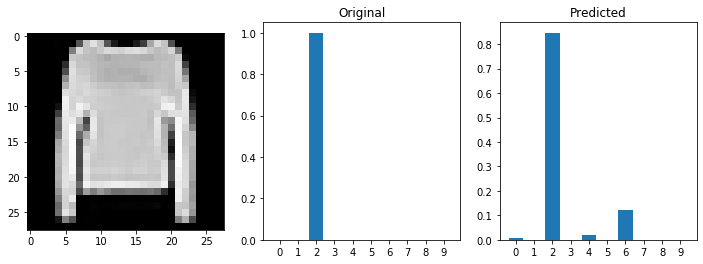

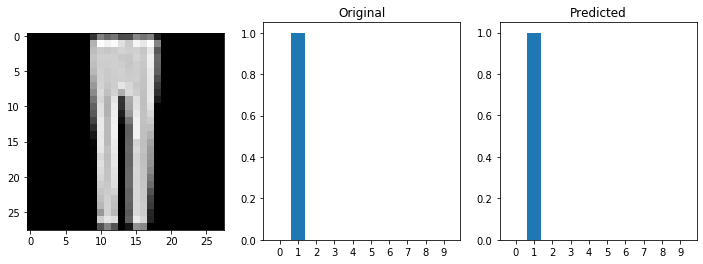

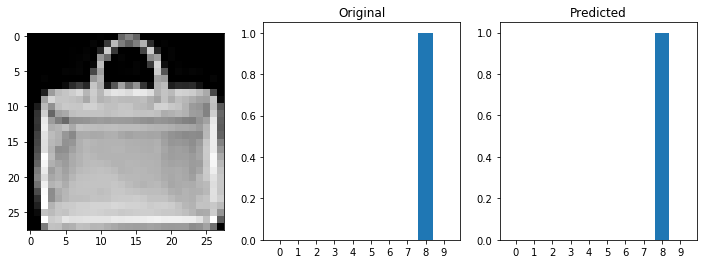

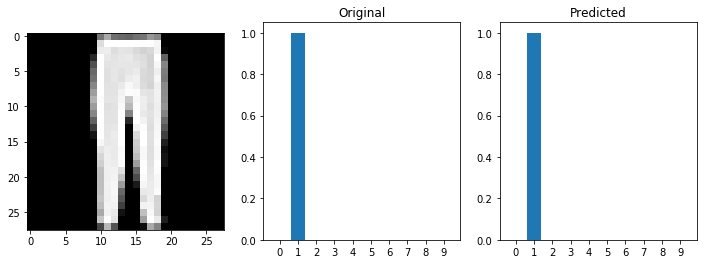

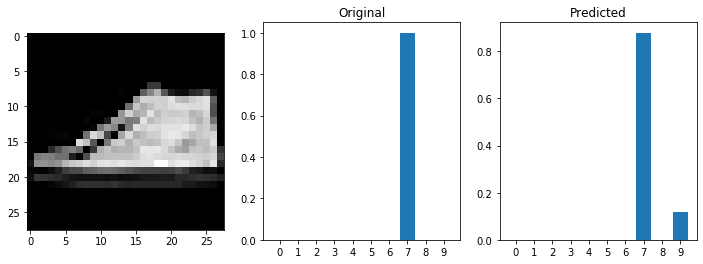

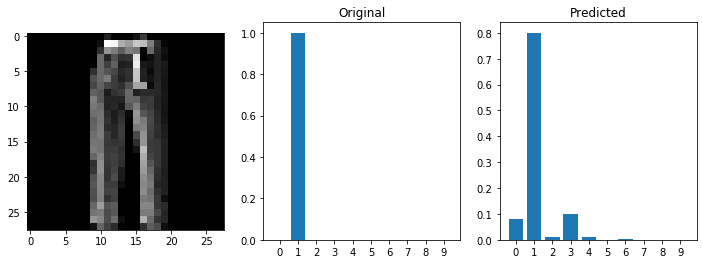

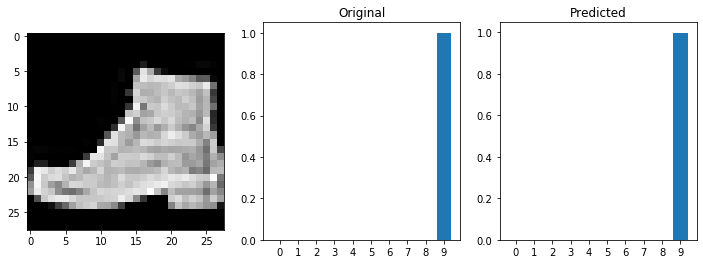

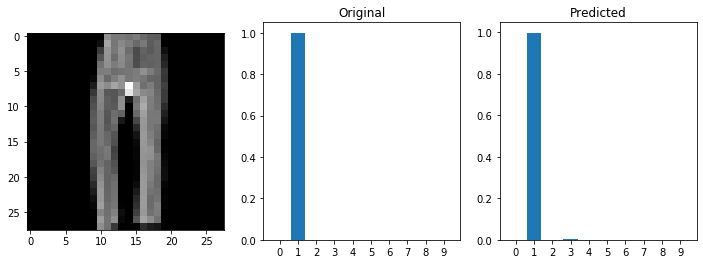

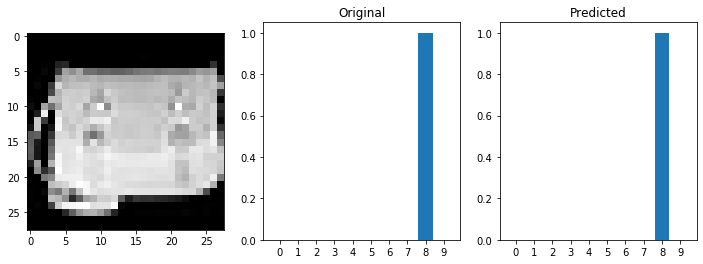

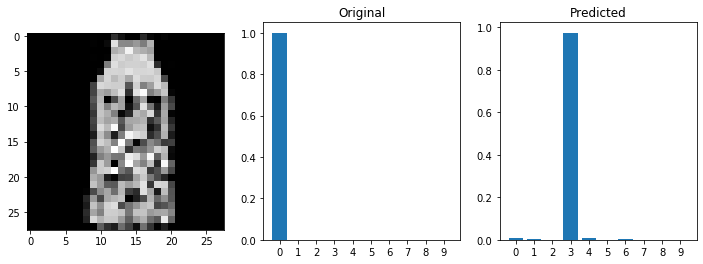

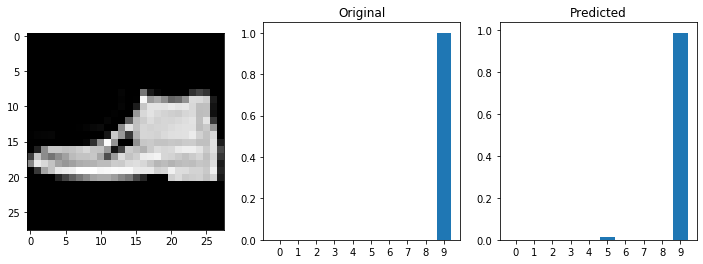

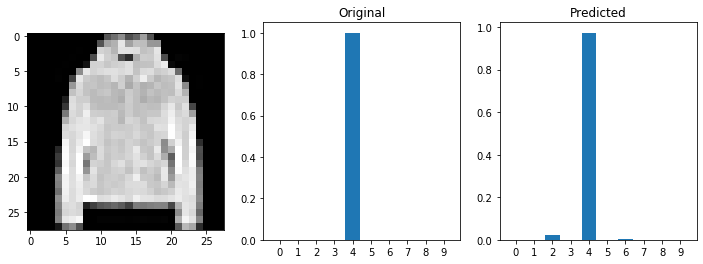

In [10]:
start = 9000  # <= Change this to choose the first of 20 test images [0, 9999-20]

for n in range(start, start+20):
    # This is the Complete Neural Network Forward Pass
    X = X_test[:, n].reshape(784, 1)
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = softmax(Z3)
    
    # Compare the prediction with the correct label
    Y = Y_test[:, n].reshape((10, 1))
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    image = X_test[:, n].reshape(28, 28)
    plt.imshow(image, cmap='gray')
    
    ind = np.arange(0, 10)
    plt.subplot(1, 3, 2)
    plt.bar(ind, Y.flatten())
    plt.xticks(range(10))
    plt.title('Original: ' + str(labels[np.argmax(Y)]))
    
    plt.subplot(1, 3, 3)
    plt.bar(ind, A3.flatten())
    plt.xticks(range(10))
    plt.title('Predicted: ' + str(labels[np.argmax(A3)]))
    
    plt.show()

In [15]:
n_correct = 0  # Number of correctly classified images

for k in range(0, 10000):
    X = X_test[:, k].reshape((784,1))
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = softmax(Z3)
    
    if (np.argmax(A3) == y_test[k]):
        n_correct = n_correct + 1
        
print('Accuracy =', n_correct/10000)

Accuracy = 0.871
